# CHƯƠNG 2: QUY TRÌNH XÂY DỰNG MỘT HỆ THỐNG HỌC MÁY - PHẦN 2
----

* Mã sinh viên: 1821050129
* Họ và tên: Nguyễn Thành Long
* Lớp:DCCTKH83A
* Email:lonngtc9c2000@gmail.com
---



In [1]:
#Gọi các thư viện sử dụng cho Project:

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# THỰC HÀNH 4
---
**Mô tả tập dữ liệu:**

Tập dữ liệu Data_practice4 chứa dữ liệu của 961 bệnh nhân bị u vú.

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 6 thuộc tính:
1. PatienID: Thuộc tính cho biết mã số của bệnh nhân
2. Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số [18-96 tuổi]
3. Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
4. Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
5. Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
6. Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)

**Yêu cầu 4.1:**
Đọc tập dữ liệu Data_Practice4.csv vào biến DataFrame, hiển thị thông tin của biến, 5 bản ghi đầu tiên và thống kê dữ liệu.


In [2]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}
path ='data/Data_Practice4.csv'
df_practice = pd.read_csv(path)


In [3]:
df_practice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  961 non-null    object 
 1   Age        956 non-null    float64
 2   Shape      930 non-null    object 
 3   Margin     913 non-null    object 
 4   Density    885 non-null    object 
 5   Target     961 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 45.2+ KB


In [4]:
df_practice

,PatientID,Age,Shape,Margin,Density,Target
0,P1,67.0,Lobular,Spiculated,Low,1
1,P2,43.0,Round,Circumscribed,NaN,1
2,P3,58.0,Irregular,Spiculated,Low,1
3,P4,28.0,Round,Circumscribed,Low,0
4,P5,74.0,Round,Spiculated,NaN,1
...,...,...,...,...,...,...
956,P957,47.0,Oval,Circumscribed,Low,0
957,P958,56.0,Irregular,Spiculated,Low,1
958,P959,64.0,Irregular,Spiculated,Low,0
959,P960,66.0,Irregular,Spiculated,Low,1


**Yêu cầu 4.2:**
Thông kê dữ liệu missing cho từng thuộc tính, và liệt kê ra các bản ghi bị missing tương ứng với thuộc tính đó.

In [5]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}
def missing_value(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100* df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent],axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0: 'số giá trị Missing', 1 : 'Tỷ lệ % missing'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(2)
    print("File dữ liệu bap gồm có: "+str(df.shape[1])+" )cột.\n"
         "có "+ str(mis_val_table_ren_columns.shape[0])+" cột chứa missing value.")
    return mis_val_table_ren_columns


In [6]:
print('số lượng missing data trong tập Train: \n')
missing_value(df_practice)

số lượng missing data trong tập Train: 

File dữ liệu bap gồm có: 6 )cột.
có 4 cột chứa missing value.


,số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


In [7]:
#Phân tích số liệu tập Train
df_practice.describe()

,Age,Target
count,956.000000,961.000000
mean,55.487448,0.463059
std,14.480131,0.498893
min,18.000000,0.000000
25%,45.000000,0.000000
50%,57.000000,0.000000
75%,66.000000,1.000000
max,96.000000,1.000000


In [8]:
#Thông kê tập dữ liệu Train các thuộc tính có dtype: Object
df_practice.describe(include=['O'])

,PatientID,Shape,Margin,Density
count,961,930,913,885
unique,961,4,5,4
top,P108,Irregular,Circumscribed,Low
freq,1,400,357,798


Yêu cầu 4.3:Phân tích, thống kê - xác định mức độ ảnh hưởng của các thuộc tính độc lập [Age, Shape, Margin, Density] tới thuộc tính phụ thuộc [Target]

**a) thuộc tính hình dạng - shape:**
---

In [9]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}
df_practice[['Shape','Target']].groupby(['Shape'],as_index=False).mean().sort_values(by='Target', ascending=False)

,Shape,Target
0,Irregular,0.787500
1,Lobular,0.473684
3,Round,0.169643
2,Oval,0.165877


shape: ảnh hưởng tới khả năng các khối u ác tính. hình dang khối u Irregular khả năng ác tính cao hơn các hình dạng còn lại(lobular,round,oval)

**b) Thuộc tính tuổi - Age:**
---

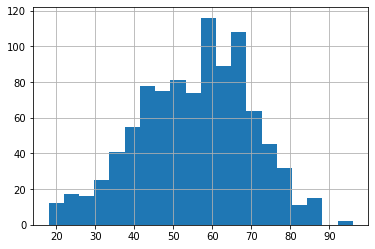

In [10]:
plt.hist(df_practice.Age,bins=20)
plt.grid(True)
plt.show()

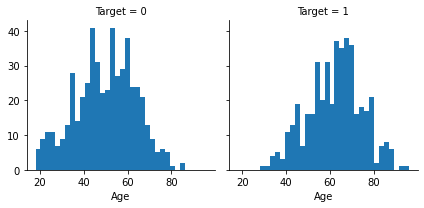

In [11]:
#Thống kê liệu tuổi bệnh nhân mắc U lành/ác tính theo tuổi
a= sns.FacetGrid(df_practice, col = 'Target')
a.map(plt.hist, 'Age',bins=30)

quan sát dữ liệu tuổi:
   + hấu hết người mắc khối u có độ tuỏo từ 35-75
   + người từ 20-50 tuổi có tỉ lệ u lành tính cao
   + người từ 55-75 tuổi có tỉ lệ u ác tính cao
   
Xem xét:
   + thuộc tính Age ảnh hưởng tới khả nắng u ác tính của bệnh nhân -> đưa vào tập huấn luyện
   + xử lý missingcuar thuộc tính Age
   + nhóm các độ tuổi theo từng group

**c) Thuộc tính Margin - đường viền:**
---

In [12]:
df_practice[["Margin","Target"]].groupby(['Margin'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Margin,Target
3,Spiculated,0.838235
4,ill-defined,0.682143
2,Obscured,0.629310
1,Microlobulated,0.625000
0,Circumscribed,0.114846


Margin: có ảnh hưởng tới khả năng mắc u ác tính. những hình dạng( Spiculated, ill-defined, obscured, Microlobulated) đều có kahr năng mắc u ác tính cao.

**d) Thuộc tính mật độ: Denisty**
---

In [13]:
df_practice[["Density","Target"]].groupby(['Density'], as_index=False).mean().sort_values(by='Target',ascending=False)

,Density,Target
3,Low,0.492481
1,High,0.437500
0,Fat-containing,0.416667
2,Iso,0.305085


Yêu cầu 4.4: Đề xuất và Áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này để có thể đưa vào các mô hình học máy và lưu kết quả dữ liệu sau xử lý ra file Data_Practice4_ok.csv

In [14]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}
df_pactice= df_practice.drop(['PatientID'],axis=1)
df_pactice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      956 non-null    float64
 1   Shape    930 non-null    object 
 2   Margin   913 non-null    object 
 3   Density  885 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 37.7+ KB


Xử lý các thuộc tính missing value:
    1. density: missing 76 bản ghi(chiếm 7.91%)
    2. margin: Missing 48 bản ghi( chiếm 4.09%)
    3. Shape

In [15]:
missing_value(df_pactice)

File dữ liệu bap gồm có: 5 )cột.
có 4 cột chứa missing value.


,số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


**a) Xử lý Density** 
---

-Xử lý các giá trị mất mát của thuộc Density:
    TT density nhận 4 giá trị.
    để thay đổi các giá trị missing, lấy giá trị lớn nhất để thay đổi các giá trị missing.
    

In [16]:
df_pactice[df_pactice['Density'].isnull()]

,Age,Shape,Margin,Density,Target
1,43.0,Round,Circumscribed,NaN,1
4,74.0,Round,Spiculated,NaN,1
19,40.0,Round,NaN,NaN,0
22,43.0,Round,NaN,NaN,0
26,66.0,Round,Circumscribed,NaN,0
...,...,...,...,...,...
614,46.0,NaN,Spiculated,NaN,1
627,57.0,Oval,Circumscribed,NaN,0
665,27.0,Oval,Circumscribed,NaN,0
677,57.0,Irregular,ill-defined,NaN,1


In [17]:
# thống kê số lượng mật độ khối u:
df_pactice['Density'].value_counts()

Low               798
Iso                59
High               16
Fat-containing     12
Name: Density, dtype: int64

giá trị low chiếm tỉ lệ cao nhất => các giá trị missing sẽ dc thay đổi thành low

In [18]:
df_pactice['Density'] = df_pactice['Density'].fillna('Low')


**B) Xử lý Margin**
---

In [19]:
df_pactice[df_pactice['Margin'].isnull()]

,Age,Shape,Margin,Density,Target
5,65.0,Round,NaN,Low,0
6,70.0,NaN,NaN,Low,0
7,42.0,Round,NaN,Low,0
12,64.0,Round,NaN,Low,0
19,40.0,Round,NaN,Low,0
20,66.0,NaN,NaN,High,1
22,43.0,Round,NaN,Low,0
27,63.0,Lobular,NaN,Low,0
35,77.0,Lobular,NaN,Low,0
48,42.0,NaN,NaN,Fat-containing,0


In [20]:
df_pactice['Margin'].value_counts()

Circumscribed     357
ill-defined       280
Spiculated        136
Obscured          116
Microlobulated     24
Name: Margin, dtype: int64

In [21]:
df_pactice['Margin']=df_pactice['Margin'].fillna('Circumscribed')

**C) Xử lý dữ liệu Shape**
---

In [22]:
df_pactice[df_pactice['Shape'].isnull()]

,Age,Shape,Margin,Density,Target
6,70.0,NaN,Circumscribed,Low,0
9,60.0,NaN,Spiculated,High,1
20,66.0,NaN,Circumscribed,High,1
48,42.0,NaN,Circumscribed,Fat-containing,0
54,53.0,NaN,Spiculated,Low,1
74,70.0,NaN,ill-defined,Low,1
83,57.0,NaN,ill-defined,High,0
128,52.0,NaN,ill-defined,Low,0
157,51.0,NaN,Circumscribed,Low,0
163,53.0,NaN,ill-defined,Low,0


In [23]:
df_pactice['Shape'].value_counts()

Irregular    400
Round        224
Oval         211
Lobular       95
Name: Shape, dtype: int64

In [24]:
df_pactice['Shape']=df_pactice['Shape'].fillna('Irregular')
df_pactice.isnull().sum()

Age        5
Shape      0
Margin     0
Density    0
Target     0
dtype: int64

In [25]:
5/961

0.005202913631633715

In [26]:
df_pactice[df_pactice['Age'].isnull()]

,Age,Shape,Margin,Density,Target
443,NaN,Irregular,Spiculated,Low,1
453,NaN,Irregular,ill-defined,Low,1
683,NaN,Lobular,Obscured,Low,1
884,NaN,Irregular,ill-defined,Low,1
923,NaN,Irregular,Obscured,Low,1


Quan sát bảng dũl iệu tuổi bị thiếu chỉ chiếm 0.005202913631633715%. 1 tỉ lệ rất nhỏ. sau khi,đã xử lý được cács dữ liệu bị thiếu của Shape, Margin, Density. từ đó ca có thể thay thế được các tuổi bị thiếu.

In [27]:
#Xử lý dữ liệu nhóm 1:
# xác định tuổi trung bình của bênh nhân u vú có thuộc tính shape= Irregular, Margin= Spiculated và Density= low.
#danh sách thỏa mãn:
df_irr_Spi =  df_pactice[(df_pactice['Shape']=='Irregular') & (df_pactice['Margin']=='Spiculated') & (df_pactice['Density']=='Low')]

In [28]:
df_mean_irr_Spi = round(df_irr_Spi['Age'].mean(),0 )
print("tuổi trung bình của nhóm1: ",df_mean_irr_Spi)

tuổi trung bình của nhóm1:  62.0


In [29]:
#thay thế dữ liệu tuổi có shape= Irregular, Margin= Spiculated và Density= low bằng tuổi trung bình của nhóm này
df_pactice[(df_pactice['Shape']=='Irregular') & (df_pactice['Margin']=='Spiculated') & (df_pactice['Density']=='Low') & (df_pactice['Age'].isnull())]

,Age,Shape,Margin,Density,Target
443,NaN,Irregular,Spiculated,Low,1


In [30]:
#thực hiện thay đổi tuỏi trung bình vào bảng:
df_pactice.loc[(df_pactice['Shape']=='Irregular') & (df_pactice['Margin']=='Spiculated') & (df_pactice['Density']=='Low')& (df_pactice['Age'].isnull()),\
               'Age'] = df_mean_irr_Spi

In [31]:
df_pactice.iloc[[443],:]

,Age,Shape,Margin,Density,Target
443,62.0,Irregular,Spiculated,Low,1


In [32]:
#nhóm2:
df_irr_ill =  df_pactice[(df_pactice['Shape']=='Irregular') & (df_pactice['Margin']=='ill-defined') & (df_pactice['Density']=='Low')]
Age_mean_irr_ill = round(df_irr_ill['Age'].mean(),0 )
print("tuổi trung bình của nhóm2: ",Age_mean_irr_ill)
df_pactice.loc[(df_pactice['Shape']=='Irregular') & (df_pactice['Margin']=='ill-defined') & (df_pactice['Density']=='Low')& (df_pactice['Age'].isnull()),\
               'Age'] = Age_mean_irr_ill

tuổi trung bình của nhóm2:  61.0


In [33]:
#nhóm3:
df_irr_obs =  df_pactice[(df_pactice['Shape']=='Irregular') & (df_pactice['Margin']=='Obscured') & (df_pactice['Density']=='Low')]
Age_mean_irr_obs = round(df_irr_obs['Age'].mean(),0 )
print("tuổi trung bình của nhóm3: ",Age_mean_irr_obs)
df_pactice.loc[(df_pactice['Shape']=='Irregular') & (df_pactice['Margin']=='Obscured') & (df_pactice['Density']=='Low')& (df_pactice['Age'].isnull()),\
               'Age'] = Age_mean_irr_obs

tuổi trung bình của nhóm3:  61.0


In [34]:
#nhóm4:
df_lob_obs =  df_pactice[(df_pactice['Shape']=='Lobular') & (df_pactice['Margin']=='Obscured') & (df_pactice['Density']=='Low')]
Age_mean_lob_obs = round(df_lob_obs['Age'].mean(),0 )
print("tuổi trung bình của nhóm4: ",Age_mean_lob_obs)
df_pactice.loc[(df_pactice['Shape']=='Lobular') & (df_pactice['Margin']=='Obscured') & (df_pactice['Density']=='Low')& (df_pactice['Age'].isnull()),\
               'Age'] = Age_mean_lob_obs

tuổi trung bình của nhóm4:  64.0


Dữ liệu sau khi xử lý Missing
--

In [35]:
missing_value(df_pactice)

File dữ liệu bap gồm có: 5 )cột.
có 0 cột chứa missing value.


,số giá trị Missing,Tỷ lệ % missing


In [36]:
df_pactice.isnull().sum()

Age        0
Shape      0
Margin     0
Density    0
Target     0
dtype: int64

In [37]:
df_pactice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      961 non-null    float64
 1   Shape    961 non-null    object 
 2   Margin   961 non-null    object 
 3   Density  961 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 37.7+ KB


Rời rạc hóa dữ liệu
---

In [38]:
#TÍnh tỷ lệ mắc u ác tính của bênh nhân theo từng khoảng tuổi:
n=5
df_temp = df_pactice.copy()
df_temp['Ageband'] = pd.cut(df_temp['Age'],n)

df_temp[['Ageband', 'Target']].groupby(['Ageband'], as_index=False).mean().sort_values(by = 'Ageband', ascending = True)

,Ageband,Target
0,"(17.922, 33.6]",0.057143
1,"(33.6, 49.2]",0.269076
2,"(49.2, 64.8]",0.460274
3,"(64.8, 80.4]",0.726908
4,"(80.4, 96.0]",0.892857


**Ta thấy rằng, tỷ lệ bênh nhân bị mác u ác tínhcos quan hệ theo độ tuổi, người già có tỷ lệ mắc cao hơn. thực hiện chia dữ liệu tuổi theo từng đoạn 
- khoảng từ 18 --> 34 tuổi: có tỉ lêj mắc thấp nhất(5,7%)
- khoảng từ 34 --> 49 tuổi: có tỉ lệ mắc thấp thứ nhì(26,9%)
- Khoảng từ 49 --> 65 tuổi: có tỉ lệ mắc thấp thứ 3 (46%)
- khoảng từ 65 --> 80 tuổi: có tỉ lệ mắc thấp thứ 4 (72,7%)
- trên 80 tuổi có tỉ lệ mắc cao nhất (89,2%)

In [39]:
df_temp

,Age,Shape,Margin,Density,Target,Ageband
0,67.0,Lobular,Spiculated,Low,1,"(64.8, 80.4]"
1,43.0,Round,Circumscribed,Low,1,"(33.6, 49.2]"
2,58.0,Irregular,Spiculated,Low,1,"(49.2, 64.8]"
3,28.0,Round,Circumscribed,Low,0,"(17.922, 33.6]"
4,74.0,Round,Spiculated,Low,1,"(64.8, 80.4]"
...,...,...,...,...,...,...
956,47.0,Oval,Circumscribed,Low,0,"(33.6, 49.2]"
957,56.0,Irregular,Spiculated,Low,1,"(49.2, 64.8]"
958,64.0,Irregular,Spiculated,Low,0,"(49.2, 64.8]"
959,66.0,Irregular,Spiculated,Low,1,"(64.8, 80.4]"


**thay thế tuổi tuyệt đối của bênh nhân bẳng khoảng tuổi thuộc vào:
* từ 18 --> 34 tuổi:   --> Age = 0
* Từ 34 --> 49 tuổi:   --> Age = 1
* Từ 49 --> 65 tuổi:   --> Age = 2
* Từ 65 --> 80 tuổi:   --> Age = 3
* Trên 80 tuổi     :   --> Age = 4

In [40]:
df_pactice.loc[(df_pactice['Age'] > 18) & (df_pactice['Age'] <= 34), 'Age'] = 1
df_pactice.loc[(df_pactice['Age'] > 34) & (df_pactice['Age'] <= 49), 'Age'] = 1
df_pactice.loc[(df_pactice['Age'] > 49) & (df_pactice['Age'] <= 65), 'Age'] = 2
df_pactice.loc[(df_pactice['Age'] > 65) & (df_pactice['Age'] <= 80), 'Age'] = 3
df_pactice.loc[ df_pactice['Age'] > 80, 'Age'] = 4

In [41]:
df_pactice

,Age,Shape,Margin,Density,Target
0,3.0,Lobular,Spiculated,Low,1
1,1.0,Round,Circumscribed,Low,1
2,2.0,Irregular,Spiculated,Low,1
3,1.0,Round,Circumscribed,Low,0
4,3.0,Round,Spiculated,Low,1
...,...,...,...,...,...
956,1.0,Oval,Circumscribed,Low,0
957,2.0,Irregular,Spiculated,Low,1
958,2.0,Irregular,Spiculated,Low,0
959,3.0,Irregular,Spiculated,Low,1


In [42]:
df_pactice['Age'] = df_pactice['Age'].astype(int)
df_pactice.head()

,Age,Shape,Margin,Density,Target
0,3,Lobular,Spiculated,Low,1
1,1,Round,Circumscribed,Low,1
2,2,Irregular,Spiculated,Low,1
3,1,Round,Circumscribed,Low,0
4,3,Round,Spiculated,Low,1


In [43]:
df_pactice['Age'] = df_pactice['Age'].astype(int)

### 4.4) Chuyển đổi dữ liệu thuộc tính sang dạng số
----
Một số thuộc tính của tập dữ liệu không phải dữ liệu số, trong bước này sẽ thực hiện chuyển đổi các dữ liệu Catagorical về dạng số để cho vào mô hình học máy.

Các thuộc tính cần chuyển đổi bao gồm:
* Margin
* shape
* Density

Thuộc tinh Margin
- Circumscribed: 0
- ill-defined: 1
- Spiculated: 2
- Obscured:3
- Microlobulated:4

In [44]:
df_pactice['Margin'] = df_pactice['Margin'].map({'Circumscribed': 0, 'ill-defined': 1, 'Spiculated': 2, 'Obscured': 3,'Microlobulated': 4}).astype(int)

thuộc tính Density
+ Low: 0
+ Iso: 1
+ High:2
+ Fat-containing: 3

In [45]:
df_pactice['Density'] = df_pactice['Density'].map({'Low': 0, 'Iso': 1, 'High': 2, 'Fat-containing': 3}).astype(int)

thuộc tính Shape:
+ Irregular
+ Round 
+ Oval
+ Lobular

In [46]:
df_pactice['Shape'] = df_pactice['Shape'].map( {'Irregular': 0, 'Round': 1, 'Oval': 2, 'Lobular': 3}).astype(int)


In [47]:
df_pactice.iloc[15:60]

,Age,Shape,Margin,Density,Target
15,2,1,0,0,0
16,2,3,1,0,0
17,2,2,0,0,1
18,2,1,0,0,1
19,1,1,0,0,0
20,3,0,0,2,1
21,2,0,3,2,1
22,1,1,0,0,0
23,1,0,1,0,1
24,2,2,1,0,1


***4,5) Kiểm tra mức độ can bằng của dữ liệu:**
----
khả năng bệnh nhân mắc u ác tính?--> thuộc tính Target

In [48]:
#Thống kê số lượng bệnh nhân có mắc u ác tính hay không ?  (1) có (2) không
x = df_pactice['Target'].value_counts()

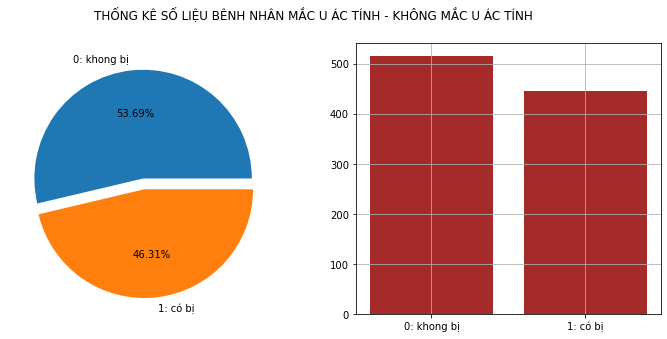

In [49]:
label=['0: khong bị','1: có bị']

s,ax =plt.subplots(1,2, figsize=(12,5))
plt.suptitle('THỐNG KÊ SỐ LIỆU BÊNH NHÂN MẮC U ÁC TÍNH - KHÔNG MẮC U ÁC TÍNH ')
ax[0].pie(x, labels=label, autopct='%.2f%%', explode=[0,0.1])

ax[1].bar(label, x, color='brown')

plt.grid(True)
plt.show()

In [50]:
# lưu dữ liệu sau đẫ xử lý vào Files

df_pactice.to_csv('Data_Practice_ok.csv',index = None)

**4.6) phân tách biến đọco lập - phụ thuộc**
--
- biến độc lập X: Shape, Margin, Density,Age.
- biến phụ thuộc y: Target.

In [51]:
df_pactice.columns

Index(['Age', 'Shape', 'Margin', 'Density', 'Target'], dtype='object')

In [52]:
#tách biến đọc lập:
X_pactice = df_pactice.iloc[:,:-1].values
X_pactice

array([[3, 3, 2, 0],
       [1, 1, 0, 0],
       [2, 0, 2, 0],
       ...,
       [2, 0, 2, 0],
       [3, 0, 2, 0],
       [2, 3, 3, 0]])

In [53]:
X_pactice =df_pactice.loc[:,['Age','Shape','Margin','Density']]
X_pactice

,Age,Shape,Margin,Density
0,3,3,2,0
1,1,1,0,0
2,2,0,2,0
3,1,1,0,0
4,3,1,2,0
...,...,...,...,...
956,1,2,0,0
957,2,0,2,0
958,2,0,2,0
959,3,0,2,0


In [54]:
y_pactice = df_pactice.loc[:,'Target'].values
y_pactice

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

**5.7) Phân tách tập dữ liệu 75-25**
--

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pactice,y_pactice, test_size=0.2, random_state=0)
print('kích thước tập training:', X_train.shape)
print('kích thước tập test:',X_test.shape)

In [ ]:
X_train

In [ ]:
X_test

## Thuc hành 5
---
tập dữ liệu mushrooms.csv chứa dữ liệu của tren 8124 cay nấm, bao gồm phân loại là nấm ăn được(e) và nấm độc(p). (lưu ý: các ký tự ? là các dữ liệu thiếu )
** yếu cầu**
1. Nghiên cứu để hiểu tập ữ liệu mushrooms.csv
2. đề xuất. áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp để đưa vào học máy.
3. lưu kết quả dữ liệu sau xử lý ra file Mushrooms_ok.csv

**Tập Dữ liệu Mushrooms**
---
Thông tin thuộc tính:
class: edible=e, poisonous=p
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
import pandas as pd
import numpy as np
import random as rnd

from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*1) tải tập dữ liệu:*
---

In [2]:
path_mush = "Data/mushrooms.csv"
df_mush = pd.read_csv(path_mush,
                     na_values = '?')
df_mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
df_mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


*2) phân tích - thống kê số liệu:*
---

*2,1) phát hiện và xử lý dữ liệu missing trong dataset:*
--
các dấu "?" trong tập dữ liệu được đặt là giá trị missing và cần được sửa chữa để không ảnh hưởng đến các model học máy.

In [4]:
#kiểm tra dữ liệu thiếu trong đataset
df_mush.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [5]:
#các dòng dữ liệu chứa missing của thuộc tính stalk-root
df_mush.loc[df_mush['stalk-root'].isnull()]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
df_mush['stalk-root'].value_counts()

b    3776
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

giá trị "b" chiếm tỉ lệ cao nhất. --> thuộc tính stalk-root các giá trị bị thiếu sẽ được thay thế bằng "b"

In [7]:
df_mush['stalk-root'] = df_mush['stalk-root'].fillna('b')

In [8]:
df_mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

*Quan sát và khai phá dữ liệu*
---

In [9]:
df_mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [10]:
#Quan sát các thuộc tính
df_mush.describe(include=['O'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


e    4208
p    3916
Name: class, dtype: int64


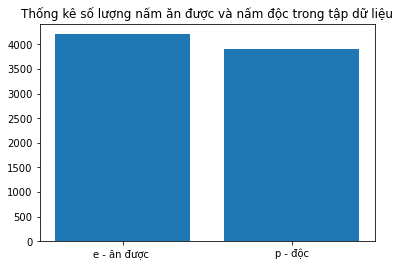

In [11]:
#thống kê số lương nấm ăn được và nấm độc
result = df_mush['class'].value_counts()
print(result)
#------------------------------------------
#trực quan hóa dữ liệu
plt.bar(['e - ăn được ', 'p - độc'], result.values)
plt.title('Thống kê số lượng nấm ăn được và nấm độc trong tập dữ liệu')
plt.show()

**chia các thuộc tính độc lập thành các nhóm:**
- nhóm 1:giá trị giống nhau( các dữ liệu phân phối giống nhau chỉ có khác biệt nhỏ giữa nấm ăn được và nấm độc)
- nhóm 2: giá trị khac nhau( các dữ liệu phân phối khác nhau giữa nấm ăn được và nấm độc)
- nhóm 3: giá trị đặc biệt(các dữ liệu phân phối đặc biệt có ở 1 hoặc 2 hoặc cả 2 đều có trên 2 loại nấm ăn được và nấm độc).

In [12]:
#nhóm 1: phân phối tương tự
similar_distributions = [
    "cap-shape",
    "gill-attachment",
    "veil-color",
    "ring-number"
]

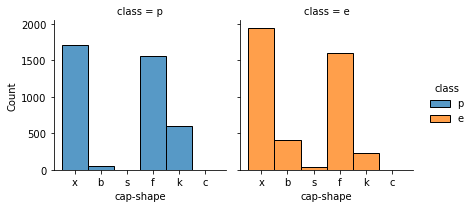

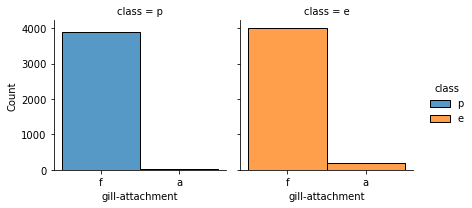

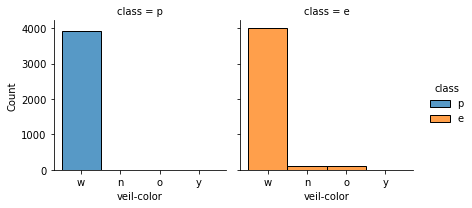

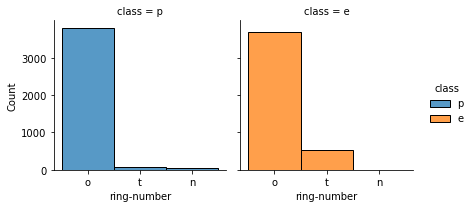

In [13]:
for col in similar_distributions:
    sns.displot(
        df_mush,
        x=col,
        hue="class",
        col="class",
        binwidth=3,
        height=3
    )

- thuộc tính cap-shape: các giá trị xuất hiện nhiều là x,k,f mà nó đều xuất hiện ở cả nấm ăn được và nấm độc. 
- thuộc tính gill-attachment: giá trị xuất hiện nhiều nhất là f mà nó đều xuất hiện ở cả nấm ăn được và nấm độc. 
- thuộc tính veil-color: giá trị xuất hiện nhiều nhất là w mà nó đều xuất hiện ở cả nấm ăn được và nấm độc. 
- thuộc tính ring-number: giá trị xuất hiện nhiều nhất là o mà nó đều xuất hiện ở cả nấm ăn được và nấm độc.

--> giá trị của các thuộc tính này đều cao và có điểm trung giống nhua giữa nấm ăn được và nấm độc. việc phân biệt giữa nấm độc và nấm ăn được sẽ rất khó khăn. 

In [14]:
#nhóm 2: phân phối ngược lại
opposite_distributions = [
    "bruises",
    "odor",
    "gill-size",
    "spore-print-color"
]

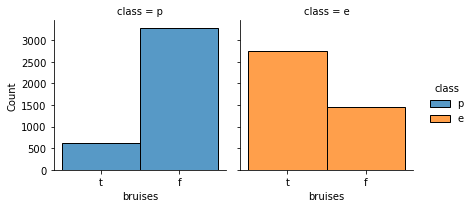

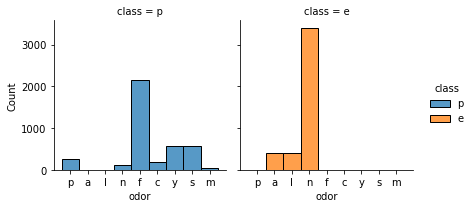

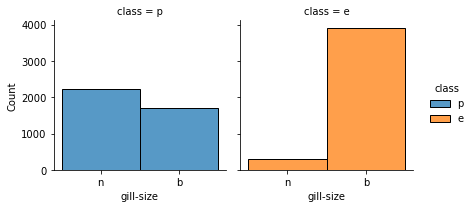

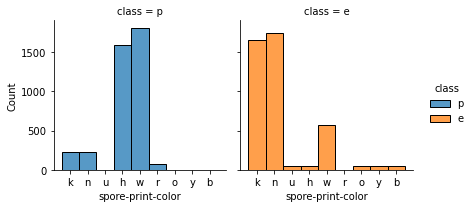

In [15]:
for col in opposite_distributions:
    sns.displot(
        df_mush,
        x=col,
        hue="class",
        col="class",
        binwidth=3,
        height=3
    )

--> ở các thuộc tính này thì nấm ăn được có giá trị riêng và nấm độc có giá trị riêng. việc phân biệt giữa nấm độc và nấm ăn được sẽ dễ dàng hơn.

In [16]:
#nhóm 3: phân phối đặc biệt
distinctive_distributions = [
    "cap-surface",
    "gill-spacing",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "ring-type",
    "population",
    "habitat"
]

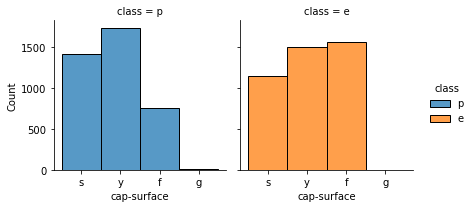

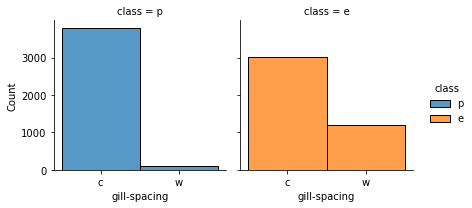

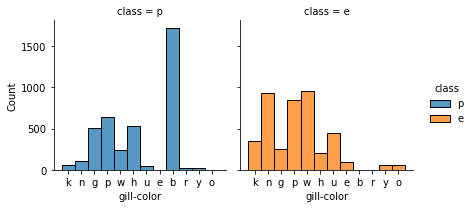

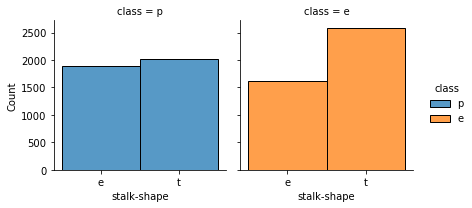

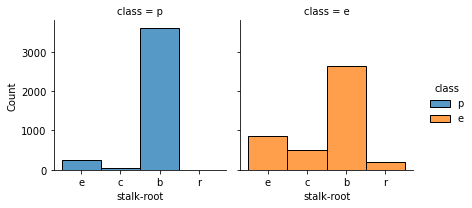

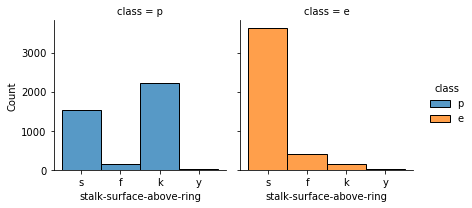

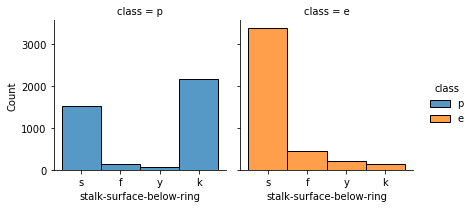

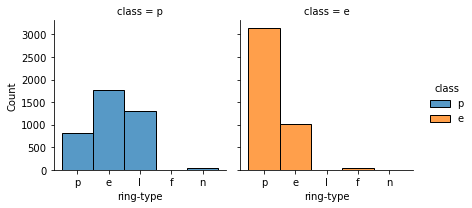

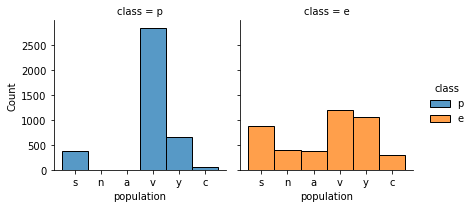

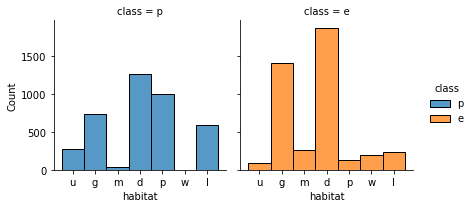

In [17]:
for col in distinctive_distributions:
    sns.displot(
        df_mush,
        x=col,
        hue="class",
        col="class",
        binwidth=3,
        height=3
    )

--> giá trị trong các thuộc tính rất đặc biêt, có những giá trị có thể giống nhau nhưng có giá trị lại khác nhhau hoàn toàn trong cùng 1 thuộc tính.

*2,2) mã hóa dữ liệu*
---
chuyển đổi về giá trị số 

In [20]:
#chuyển đổi các thuộc tính từ ' đối tượng' thành dạnh 'danh mục'

def make_categorical(df_mush, columns):
    
    for column in columns:
        df_mush[column] = pd.Categorical(df_mush[column])
    return df_mush

In [21]:
columns = df_mush.columns
df_mush = make_categorical(df_mush, columns)

In [22]:
def label_encode_fit(df_mush, columns):
    result = df_mush.copy()
    encoders = {}
    for column in columns:
        encoder = preprocessing.LabelEncoder()
        result[column]= encoder.fit_transform(result[column])
        encoders[column] = encoder
    return result, encoders

In [23]:
df_mush1, encoders1 = label_encode_fit(df_mush, columns)

In [24]:
df_mush1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [25]:
df_mush1.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


*2,3) kiểm tra mức độ cân bằng của dữ liệu*
--

In [26]:
x = df_mush1['class'].value_counts()

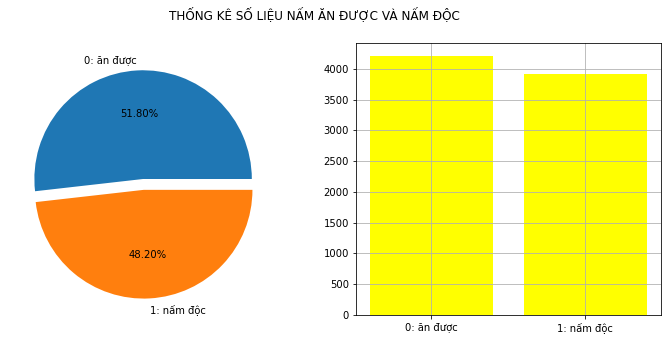

In [27]:
label= ['0: ăn được','1: nấm độc']

s,ax = plt.subplots(1,2, figsize=(12,5))
plt.suptitle('THỐNG KÊ SỐ LIỆU NẤM ĂN ĐƯỢC VÀ NẤM ĐỘC')
ax[0].pie(x, labels = label, autopct = '%.2f%%', explode = [0,0.1])

ax[1].bar(label, x, color='yellow')

plt.grid(True)
plt.show()

*2,4) phân tách biến độc lập- phụ thuộc*
--

In [28]:
df_mush.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [29]:
#tách biến độc lập:
X_mush =df_mush1.iloc[:,1:].values
X_mush

array([[5, 2, 4, ..., 2, 3, 5],
       [5, 2, 9, ..., 3, 2, 1],
       [0, 2, 8, ..., 3, 2, 3],
       ...,
       [2, 2, 4, ..., 0, 1, 2],
       [3, 3, 4, ..., 7, 4, 2],
       [5, 2, 4, ..., 4, 1, 2]])

In [30]:
X_mush.shape

(8124, 22)

In [31]:
X_mush = df_mush1.loc[:,['cap-shape', 'cap-surface', 'cap-color', 
                         'bruises', 'odor','gill-attachment', 
                         'gill-spacing', 'gill-size', 'gill-color',
                         'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                         'stalk-surface-below-ring', 'stalk-color-above-ring',
                         'stalk-color-below-ring', 'veil-type', 'veil-color', 
                         'ring-number','ring-type', 'spore-print-color', 
                         'population', 'habitat']]
X_mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [32]:
y_mush = df_mush1.loc[:,'class'].values
y_mush

array([1, 0, 0, ..., 0, 1, 0])

*2,5) phân tách tập dữ liệu 75-25*
---

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mush,y_mush, test_size = 0.3, random_state=0)
print("1.kích thước tập trianing:", X_train.shape)
print("2.kích thước tập test:",X_test.shape)

1.kích thước tập trianing: (5686, 22)
2.kích thước tập test: (2438, 22)


In [34]:
X_train

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5314,5,2,8,1,2,1,0,0,3,1,...,2,7,7,0,2,1,4,1,4,1
2075,5,2,9,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,2,3
5165,2,2,8,1,2,1,0,0,7,1,...,2,7,7,0,2,1,4,1,3,1
1155,0,3,8,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,3,3
4448,5,3,9,0,2,1,0,0,3,0,...,1,0,0,0,2,1,2,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,5,3,2,1,5,1,0,0,1,0,...,2,2,2,0,2,2,0,7,1,6
3264,5,0,3,0,2,1,0,0,3,0,...,1,6,4,0,2,1,2,1,5,4
1653,5,2,3,0,5,1,1,0,3,1,...,2,7,7,0,2,1,0,3,3,1
2607,2,0,4,1,5,1,0,0,5,1,...,2,3,3,0,2,1,4,3,4,0


In [35]:
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
380,5,3,4,1,6,1,0,1,7,0,...,2,7,7,0,2,1,4,2,3,5
3641,2,3,3,1,5,1,0,0,7,1,...,2,3,3,0,2,1,4,2,5,0
273,5,3,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,3
1029,5,2,8,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,2,0,1
684,5,0,4,1,5,1,0,0,7,1,...,2,6,7,0,2,1,4,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,5,2,8,1,3,1,0,0,10,0,...,2,7,7,0,2,1,4,2,2,3
36,4,0,3,0,5,1,0,1,4,0,...,2,7,7,0,2,1,4,2,4,5
7959,3,3,2,0,2,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,2
6520,5,3,2,0,8,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,4


*3) lưu tập dữ liệu sang file csv*
---

In [37]:
df_mush1.to_csv('Data_mushrooms.csv', index = None)